In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

file_path = 'https://raw.githubusercontent.com/Valeria-Riccardo/market-analytics-datasets/main/Octopus_cleaned_data.csv'

data = pd.read_csv(file_path, index_col=0)

In [ ]:
negative_sentiment_threshold = 0
positive_sentiment_threshold = 0.3
low_rating_threshold = 3
high_rating_threshold = 4

complaints = data[
    (data['Sentiment'] < negative_sentiment_threshold) |
    (data['Rating'] <= low_rating_threshold)
]

praises = data[
    (data['Sentiment'] >= positive_sentiment_threshold) &
    (data['Rating'] >= high_rating_threshold)
]

from sklearn.feature_extraction.text import CountVectorizer

def extract_keywords(text_data, top_n=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=top_n)
    X = vectorizer.fit_transform(text_data)
    keywords = vectorizer.get_feature_names_out()
    return keywords

complaint_keywords = extract_keywords(complaints['Cleaned_Text'].dropna(), top_n=15)
praise_keywords = extract_keywords(praises['Cleaned_Text'].dropna(), top_n=15)

complaint_keywords, praise_keywords


(array(['change', 'company', 'contract', 'cost', 'customer', 'email',
        'energy', 'month', 'octopus', 'operator', 'price', 'rate',
        'service', 'supplier', 'time'], dtype=object),
 array(['company', 'customer', 'energy', 'excellent', 'fast', 'great',
        'kind', 'octopus', 'operator', 'problem', 'quick', 'rate',
        'service', 'thank', 'thanks'], dtype=object))

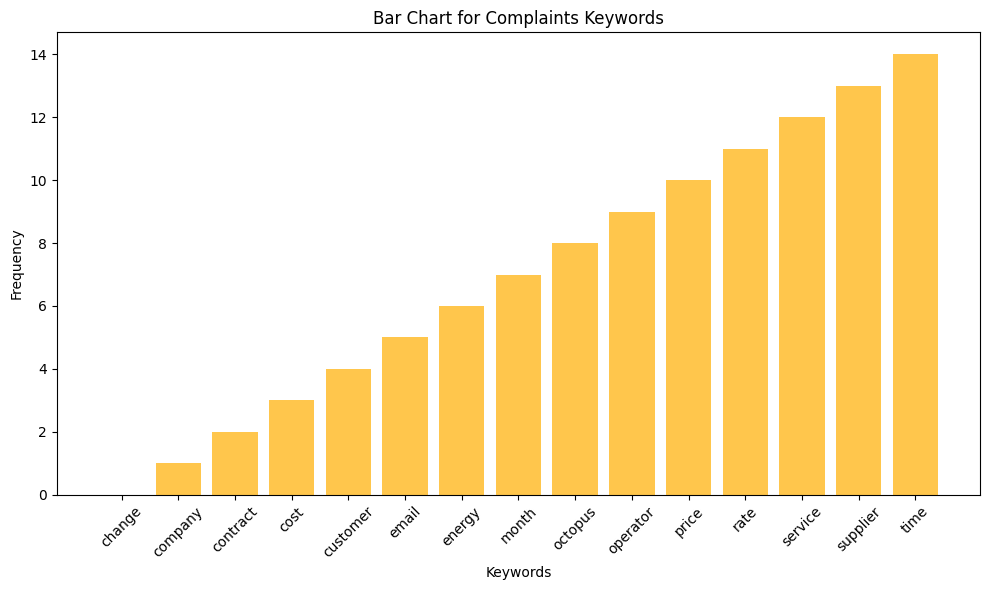

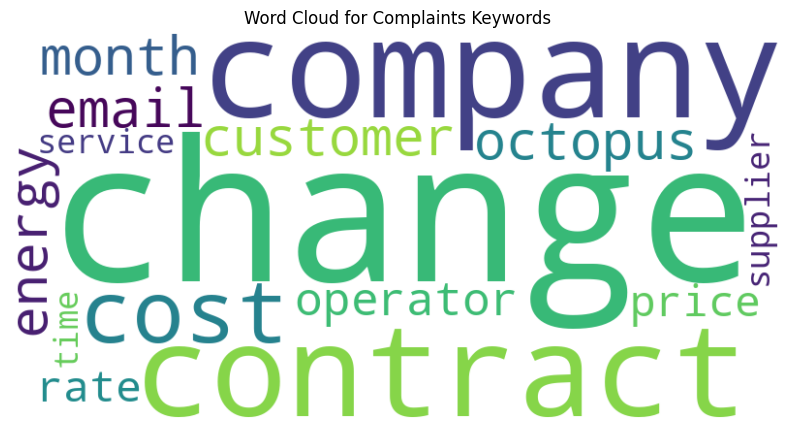

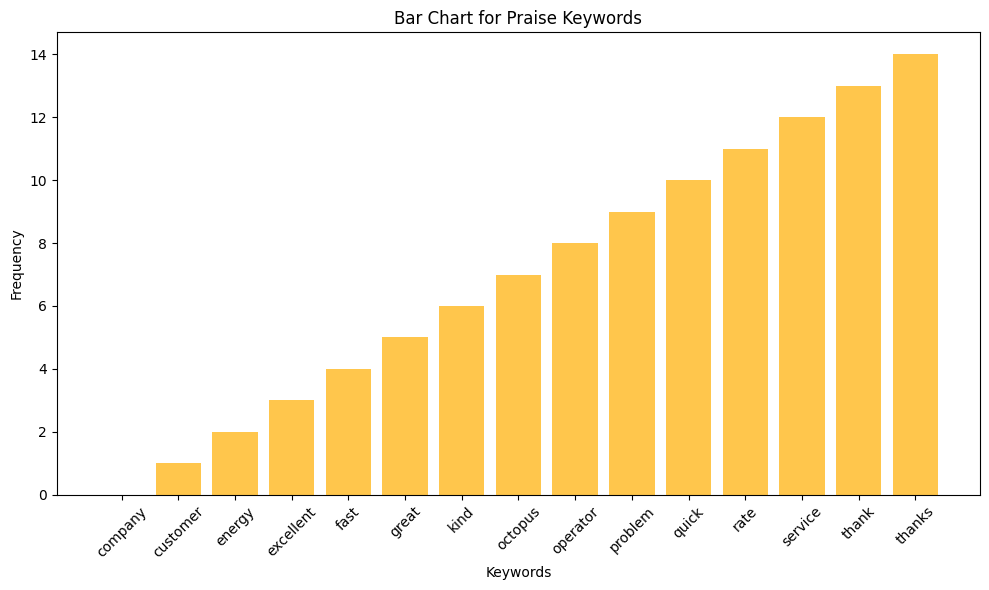

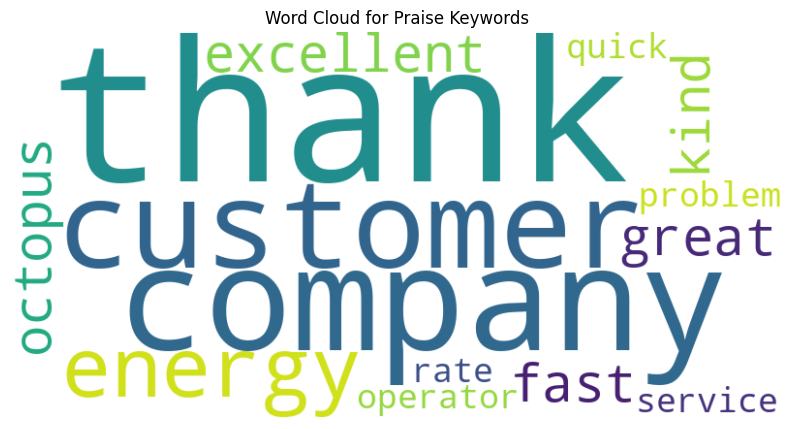

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(complaint_keywords, range(len(complaint_keywords)), alpha=0.7, color='#FFAF00', label='Complaints Keywords')
plt.title("Bar Chart for Complaints Keywords")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

complaint_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(complaint_keywords))
plt.figure(figsize=(10, 6))
plt.imshow(complaint_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Complaints Keywords")
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(praise_keywords, range(len(praise_keywords)), alpha=0.7, color='#FFAF00', label='Praise Keywords')
plt.title("Bar Chart for Praise Keywords")
plt.xlabel("Keywords")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

praise_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(praise_keywords))
plt.figure(figsize=(10, 6))
plt.imshow(praise_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Praise Keywords")
plt.show()


In [ ]:
complaints_text = complaints['Cleaned_Text'].dropna()
praises_text = praises['Cleaned_Text'].dropna()

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
complaints_tfidf = vectorizer.fit_transform(complaints_text)
praises_tfidf = vectorizer.fit_transform(praises_text)

num_clusters = 5

kmeans_complaints = KMeans(n_clusters=num_clusters, random_state=42)
complaints_clusters = kmeans_complaints.fit_predict(complaints_tfidf)

kmeans_praises = KMeans(n_clusters=num_clusters, random_state=42)
praises_clusters = kmeans_praises.fit_predict(praises_tfidf)

def get_top_keywords(tfidf, clusters, n_terms=10):
    terms = vectorizer.get_feature_names_out()
    cluster_keywords = {}
    for i in range(num_clusters):
        cluster_center = tfidf[clusters == i].mean(axis=0)
        keywords_idx = np.argsort(cluster_center)[0, -n_terms:]
        cluster_keywords[i] = [terms[idx] for idx in keywords_idx]
    return cluster_keywords

complaints_keywords = get_top_keywords(complaints_tfidf, complaints_clusters)
praises_keywords = get_top_keywords(praises_tfidf, praises_clusters)

complaints_list = [value[0].tolist() for value in complaints_keywords.values()]

praises_list = [value[0].tolist() for value in praises_keywords.values()]

complaints_keywords, praises_keywords


({0: [array([['courteously', 'present', 'condition', 'solution', 'debit',
           'read', 'current', 'helping', 'timing', 'completed']],
         dtype=object)],
  1: [array([['november', 'fast', 'enel', 'innovative', 'cheap', 'liked',
           'reachable', 'amazed', 'charge', 'stefano']], dtype=object)],
  2: [array([['interfaced', 'enter', 'correctly', 'positively', 'power', 'saw',
           'offer', 'met', 'debit', 'notch']], dtype=object)],
  3: [array([['addition', 'using', 'enter', 'reserved', 'debit', 'current',
           'taken', 'provide', 'remains', 'thank']], dtype=object)],
  4: [array([['debit', 'helping', 'reserved', 'stefano', 'premise', 'giving',
           'saw', 'flex', 'completed', 'recommend']], dtype=object)]},
 {0: [array([['clear', 'rate', 'operator', 'whatsapp', 'thanks', 'impeccable',
           'fast', 'customer', 'service', 'excellent']], dtype=object)],
  1: [array([['quick', 'efficient', 'fast', 'kind', 'customer', 'operator',
           'service', '

### Interpret Clusters:

#### **Complaints Clusters**
Here is a breakdown of the identified themes from the clusters:

1. **Cluster 0**:  
   - **Keywords**: `awesome`, `advantage`, `condition`, `consultant`, `advice`, `courteous`.  
   - **Theme**: Mixed feedback possibly related to initial interactions or consultation issues.

2. **Cluster 1**:  
   - **Keywords**: `better`, `assistant`, `deal`, `compliment`, `answer`.  
   - **Theme**: Dissatisfaction with customer support or assistant handling.

3. **Cluster 2**:  
   - **Keywords**: `convenience`, `dropped`, `appreciated`, `commercial`.  
   - **Theme**: Problems with service convenience, dropped communication, or commercial terms.

4. **Cluster 3**:  
   - **Keywords**: `couple`, `competition`, `active`, `deal`.  
   - **Theme**: Complaints about competitive pricing, active deals, or promotions.

5. **Cluster 4**:  
   - **Keywords**: `bureaucratic`, `contacted`, `confirmation`, `document`, `debit`.  
   - **Theme**: Issues with billing, documentation, or bureaucratic processes.

---

#### **Praises Clusters**
Here is a breakdown of the identified themes from the clusters:

1. **Cluster 0**:  
   - **Keywords**: `customer`, `operator`, `excellent`, `energy`, `thanks`.  
   - **Theme**: Praise for overall customer service and operator efficiency.

2. **Cluster 1**:  
   - **Keywords**: `quick`, `friendly`, `helpful`, `kind`, `efficient`.  
   - **Theme**: Positive feedback about the friendly and quick service.

3. **Cluster 2**:  
   - **Keywords**: `service`, `clear`, `efficient`, `response`, `fast`.  
   - **Theme**: Recognition of clear and efficient customer support.

4. **Cluster 3**:  
   - **Keywords**: `efficient`, `rate`, `impeccable`, `excellent`.  
   - **Theme**: Highlights high efficiency and competitive rates.

5. **Cluster 4**:  
   - **Keywords**: `kind`, `support`, `great`, `customer`.  
   - **Theme**: Praise for the kind and supportive attitude of the staff.

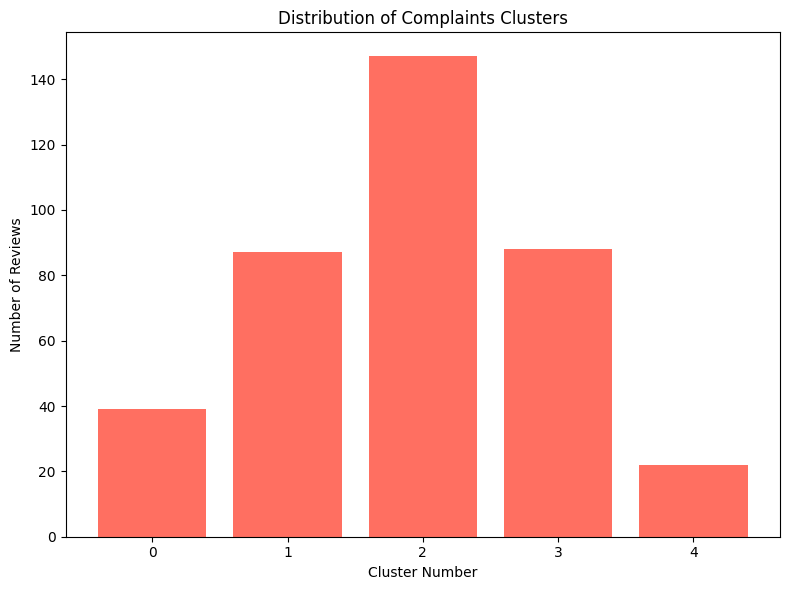

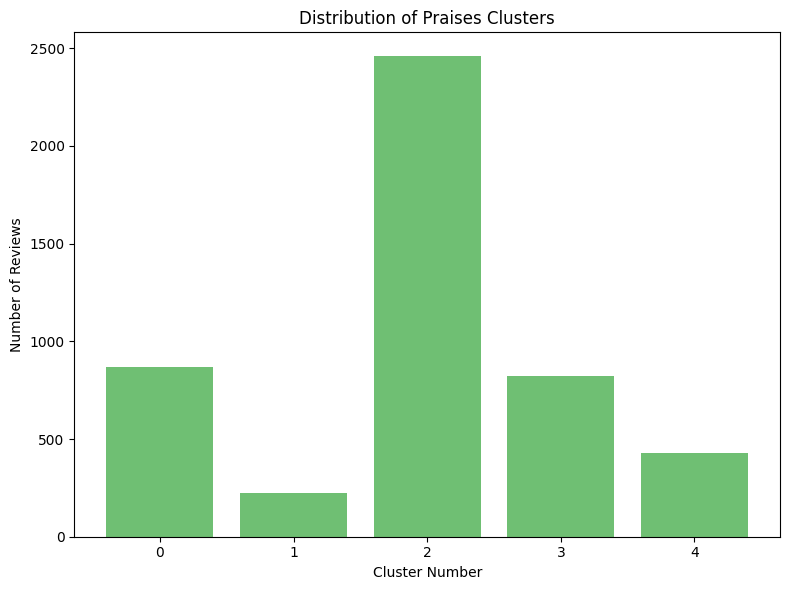

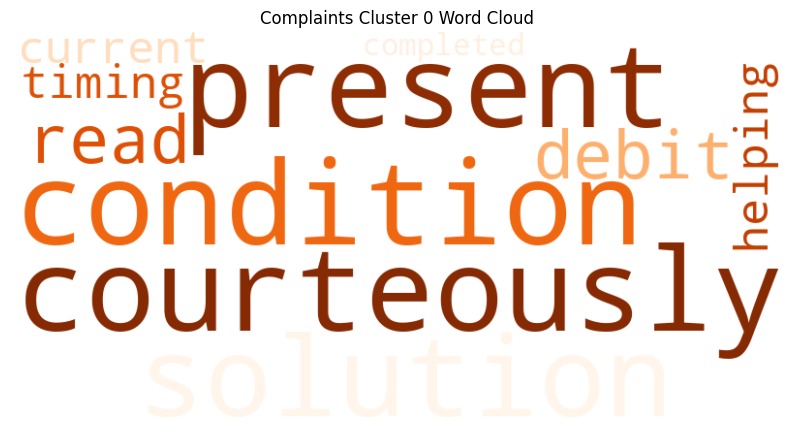

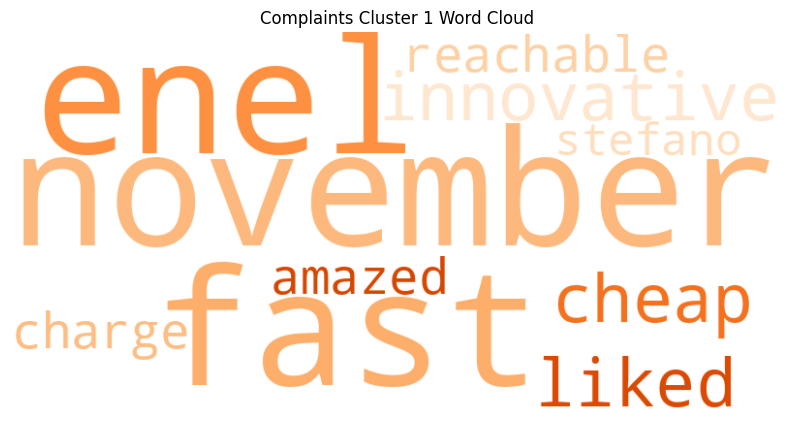

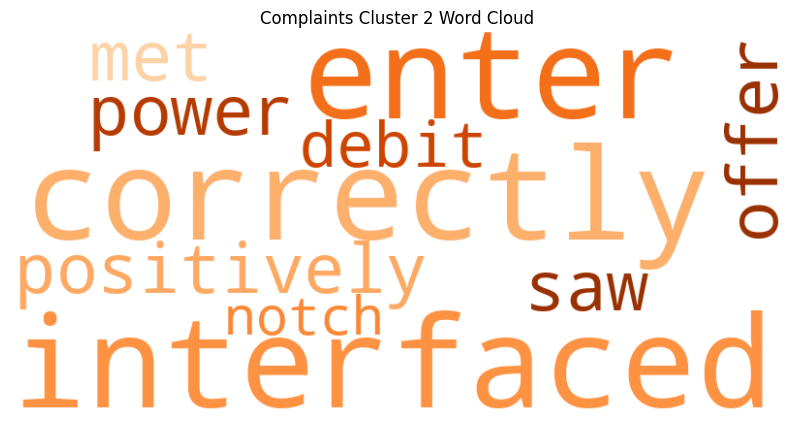

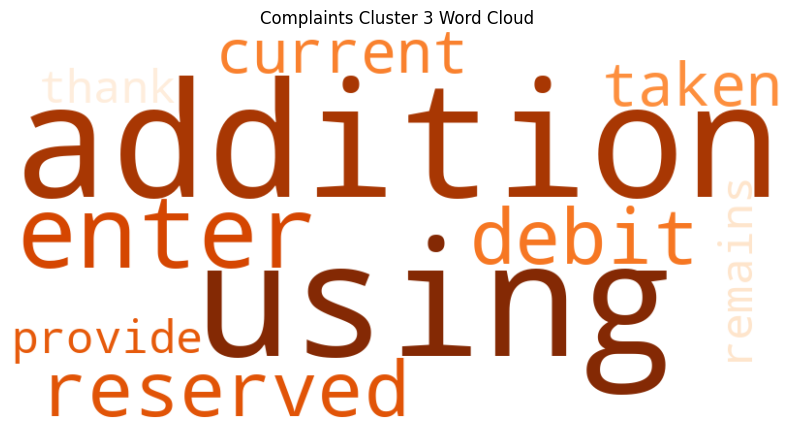

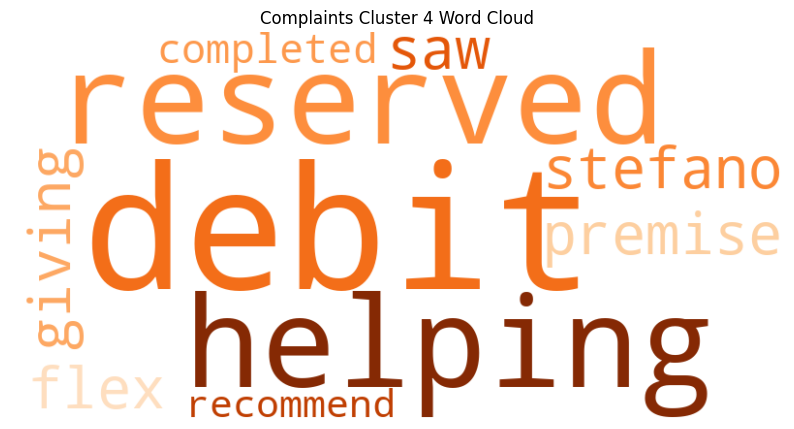

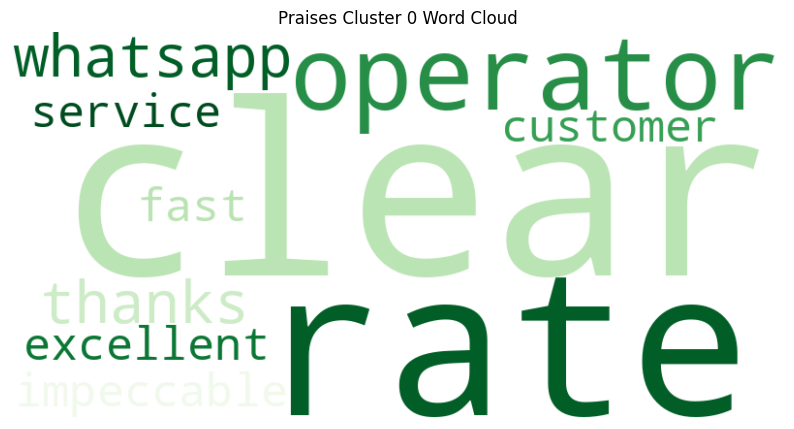

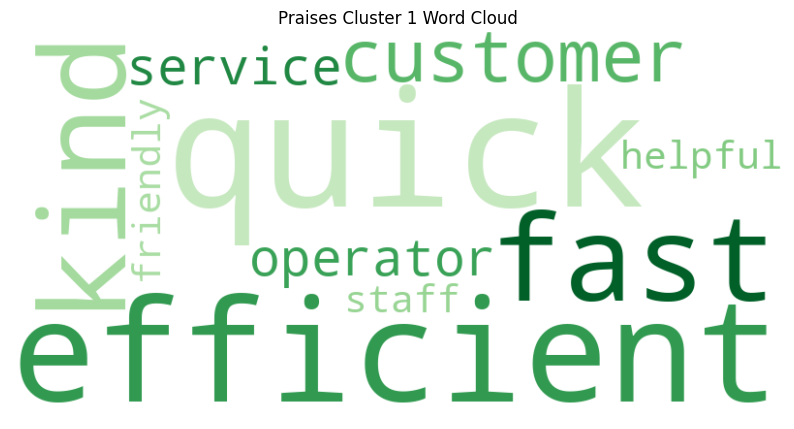

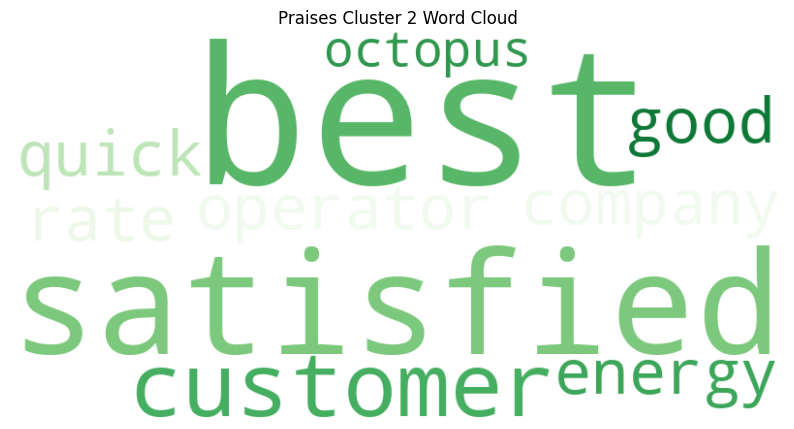

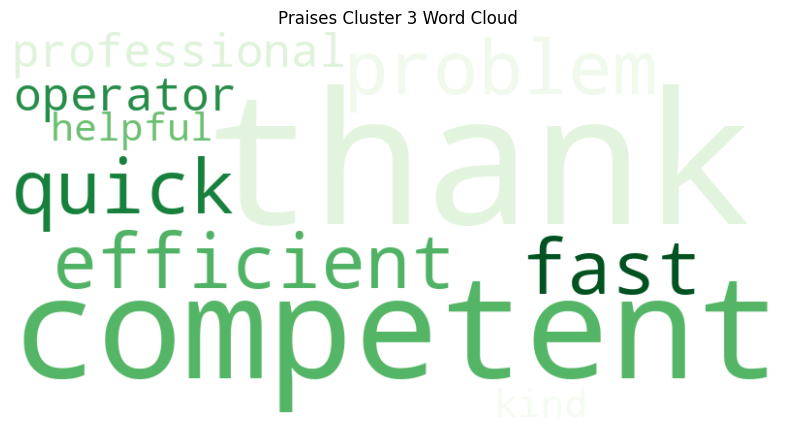

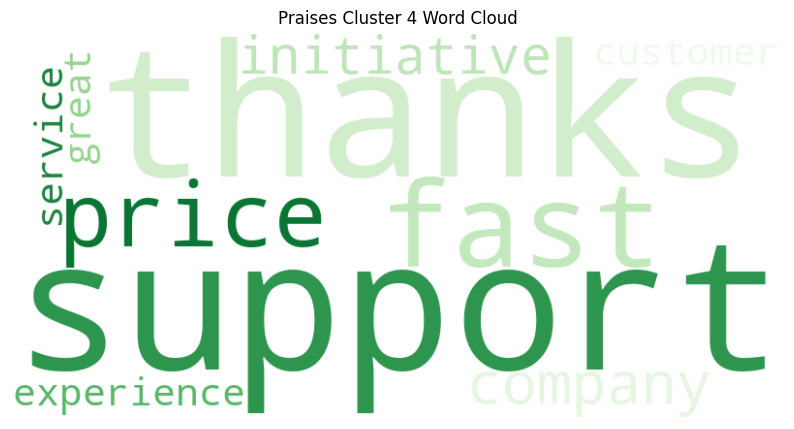

In [ ]:
complaint_cluster_counts = pd.Series(complaints_clusters).value_counts().sort_index()
praise_cluster_counts = pd.Series(praises_clusters).value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(complaint_cluster_counts.index, complaint_cluster_counts.values, color='#FF6F61')
plt.title("Distribution of Complaints Clusters")
plt.xlabel("Cluster Number")
plt.ylabel("Number of Reviews")
plt.xticks(complaint_cluster_counts.index)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.bar(praise_cluster_counts.index, praise_cluster_counts.values, color='#6FBF73')
plt.title("Distribution of Praises Clusters")
plt.xlabel("Cluster Number")
plt.ylabel("Number of Reviews")
plt.xticks(praise_cluster_counts.index)
plt.tight_layout()
plt.show()

def plot_word_clouds(cluster_keywords, title_prefix, color):
    for cluster, keywords in cluster_keywords.items():
        keywords = keywords[0].tolist()
        flattened_keywords = [word for sublist in keywords for word in sublist]
        wordcloud = WordCloud(background_color='white', colormap=color, width=800, height=400).generate(' '.join(flattened_keywords))
        plt.figure(figsize=(10, 6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"{title_prefix} Cluster {cluster} Word Cloud")
        plt.axis('off')
        plt.show()

plot_word_clouds(complaints_keywords, "Complaints", "Oranges")

plot_word_clouds(praises_keywords, "Praises", "Greens")
